In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities

In [2]:
q_l = 50  # Community size
N_t = 4 * q_l  # Total number of nodes
k_l = 3  # Average degree of each layer
μ_l = 0.025  # The mixing parameter

In [208]:
# Correlated network:

# Create an empty graph
G_C = nx.Graph()

# Add nodes for community 1, 2, 3, 4
 
G_C.add_nodes_from(range(q_l), community=1)
G_C.add_nodes_from(range(q_l, 2*q_l), community=2)
G_C.add_nodes_from(range(2*q_l, 3*q_l), community=3)
G_C.add_nodes_from(range(3*q_l, 4*q_l), community=4)

# Layer 1
# Add inter-community edges
for c in range(4):
    for i in range(c*q_l, (c+1)*q_l):
        for j in range(c*q_l, (c+1)*q_l):
            p = k_l * (1 - μ_l) / (2 * (q_l - 1))
            if i != j and np.random.random() < p:
                G_C.add_edge(i, j, layer=1)

# Add intra-community edges
for i in range(N_t):
    for j in range(N_t):
        if G_C.nodes[i]['community'] != G_C.nodes[j]['community']:
            p = k_l * μ_l / (2 * (N_t - q_l))
            if i != j and np.random.random() < p:
                G_C.add_edge(i, j, layer=1)

# Layer 2
# Add inter-community edges
for c in range(4):
    for i in range(c*q_l, (c+1)*q_l):
        for j in range(c*q_l, (c+1)*q_l):
            p = k_l * (1 - μ_l) / (2 * (q_l - 1))
            if i != j and np.random.random() < p:
                G_C.add_edge(i, j, layer=2)

# Add intra-community edges
for i in range(N_t):
    for j in range(N_t):
        if G_C.nodes[i]['community'] != G_C.nodes[j]['community']:
            p = k_l * μ_l / (2 * (N_t - q_l))
            if i != j and np.random.random() < p:
                G_C.add_edge(i, j, layer=2)

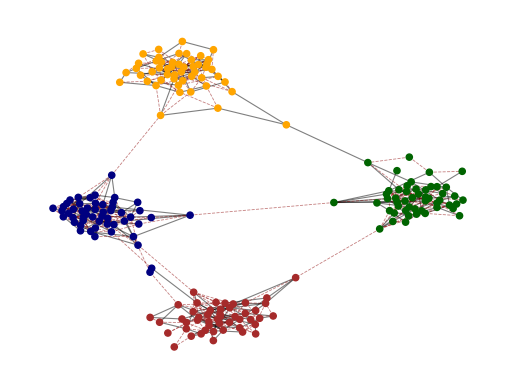

In [211]:
# Find the communities
c = list(greedy_modularity_communities(G_C))

# Create a color map
color_map_C = []
for node in G_C:
    if node in c[0]:
        color_map_C.append('navy')
    elif node in c[1]:
        color_map_C.append('darkgreen')
    elif node in c[2]:
        color_map_C.append('orange')
    else:
        color_map_C.append('brown')
        
# Find the edges in each layer
layer1_edges = []
layer2_edges = []
layer1_edges_weight = []
layer2_edges_weight = []
layer1_edges_linestyle = []
layer2_edges_linestyle = []
layer1_edges_linecolor = []
layer2_edges_linecolor = []
for edge in G_C.edges():
    if G_C.edges[edge]['layer'] == 1:
        layer1_edges.append(edge)
        layer1_edges_weight.append(0.8)
        layer1_edges_linestyle.append('solid')
        layer1_edges_linecolor.append('black')
    else:
        layer2_edges.append(edge)
        layer2_edges_weight.append(0.6)
        layer2_edges_linestyle.append('dashed')
        layer2_edges_linecolor.append('darkred')


# Draw the graph
g_pos = nx.spring_layout(G_C)
nx.draw_networkx_nodes(G_C, node_color=color_map_C, node_size=20.0, pos=g_pos)
nx.draw_networkx_edges(G_C, pos=g_pos, edgelist=layer1_edges + layer2_edges,
                       width=layer1_edges_weight + layer2_edges_weight, style=layer1_edges_linestyle + layer2_edges_linestyle,
                       edge_color=layer1_edges_linecolor + layer2_edges_linecolor, alpha=0.5)
plt.axis('off')
plt.savefig('correlated_network.png', dpi=300)

In [212]:
# Uncorrelated network:

# Create an empty graph
G_UC = nx.Graph()

# Add nodes for community 1, 2, 3, 4

G_UC.add_nodes_from(range(q_l), community=1)
G_UC.add_nodes_from(range(q_l, 2*q_l), community=2)
G_UC.add_nodes_from(range(2*q_l, 3*q_l), community=3)
G_UC.add_nodes_from(range(3*q_l, 4*q_l), community=4)

# Layer 1
for i in range(N_t):
    for j in range(N_t):
        p = k_l * (1 - μ_l) / (2 * (N_t - 1))
        if i != j and np.random.random() < p:
            G_UC.add_edge(i, j, layer=1)

# Layer 2
for i in range(N_t):
    for j in range(N_t):
        p = k_l * (1 - μ_l) / (2 * (N_t - 1))
        if i != j and np.random.random() < p:
            G_UC.add_edge(i, j, layer=2)

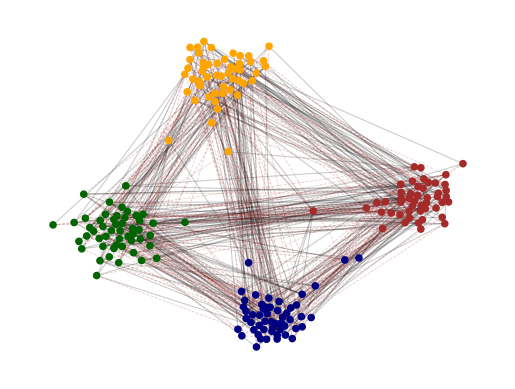

In [217]:
# Find the communities
c = list(greedy_modularity_communities(G_UC))

# Create a color map
color_map_UC = []
for node in G_UC:
    if node in c[0]:
        color_map_UC.append('navy')
    elif node in c[1]:
        color_map_UC.append('darkgreen')
    elif node in c[2]:
        color_map_UC.append('orange')
    else:
        color_map_UC.append('brown')

# Find the edges in each layer
layer1_edges = []
layer2_edges = []
layer1_edges_weight = []
layer2_edges_weight = []
layer1_edges_linestyle = []
layer2_edges_linestyle = []
layer1_edges_linecolor = []
layer2_edges_linecolor = []
for edge in G_UC.edges():
    if G_UC.edges[edge]['layer'] == 1:
        layer1_edges.append(edge)
        layer1_edges_weight.append(0.8)
        layer1_edges_linestyle.append('solid')
        layer1_edges_linecolor.append('black')
    else:
        layer2_edges.append(edge)
        layer2_edges_weight.append(0.6)
        layer2_edges_linestyle.append('dashed')
        layer2_edges_linecolor.append('darkred')


# Draw the graph
g_pos = nx.spring_layout(G_C)
nx.draw_networkx_nodes(G_C, node_color=color_map_C, node_size=20.0, pos=g_pos)
nx.draw_networkx_edges(G_C, pos=g_pos, edgelist=layer1_edges + layer2_edges,
        width=layer1_edges_weight + layer2_edges_weight, style=layer1_edges_linestyle + layer2_edges_linestyle,
        edge_color=layer1_edges_linecolor + layer2_edges_linecolor, alpha=0.2)
plt.axis('off')
plt.savefig('uncorrelated_network.png', dpi=300)

In [136]:
def simulate_SIR(G, β, γ, n):
    # SIR model on correlated network
    # Get a copy of the network
    TheCorNetwork = G.copy()

    # Selecting the initial infected node
    # Select a random node
    i = np.random.choice(TheCorNetwork.nodes)
    # Infect the node
    TheCorNetwork.nodes[i]['state'] = 'I'
    # Considering others are susceptible
    for node in TheCorNetwork.nodes:
        if node != i:
            TheCorNetwork.nodes[node]['state'] = 'S'

    # Run the simulation
    # Create a list to store the number of nodes for each state for each time step
    S = []
    I = []
    R = []

    for t in range(n):
        # Create a dictionary to store the number of nodes for each state
        S_t = 0
        I_t = 0
        R_t = 0
        
        ToInfecteds = []
        ToRecovered = []
        # Iterate over all nodes
        for node in TheCorNetwork.nodes:
            # If the node is susceptible
            if TheCorNetwork.nodes[node]['state'] == 'S':
                # Iterate over all neighbors of the node
                for neighbor in TheCorNetwork.neighbors(node):
                    # If the neighbor is infected
                    if TheCorNetwork.nodes[neighbor]['state'] == 'I':
                        # The susceptible node will be infected with probability β
                        if np.random.random() < β:
                            ToInfecteds.append(node)
                            break
            # If the node is infected
            elif TheCorNetwork.nodes[node]['state'] == 'I':
                # The infected node will recover with probability γ
                if np.random.random() < γ:
                    ToRecovered.append(node)
            # Count the number of nodes for each state
            if TheCorNetwork.nodes[node]['state'] == 'S':
                S_t += 1
            elif TheCorNetwork.nodes[node]['state'] == 'I':
                I_t += 1
            else:
                R_t += 1
        # Update the states of nodes
        for node in ToInfecteds:
            TheCorNetwork.nodes[node]['state'] = 'I'
        for node in ToRecovered:
            TheCorNetwork.nodes[node]['state'] = 'R'
        # Append the number of nodes for each state to the list
        S.append(S_t)
        I.append(I_t)
        R.append(R_t)
        
    return S, I, R

In [218]:
Ansemble_C = [simulate_SIR(G_C, 0.4, 1.0, 25) for i in range(20000)]
S_C = np.mean([i[0] for i in Ansemble_C], axis=0)
I_C = np.mean([i[1] for i in Ansemble_C], axis=0)
R_C = np.mean([i[2] for i in Ansemble_C], axis=0)

Ansemble_UC = [simulate_SIR(G_UC, 0.4, 1.0, 25) for i in range(20000)]
S_UC = np.mean([i[0] for i in Ansemble_UC], axis=0)
I_UC = np.mean([i[1] for i in Ansemble_UC], axis=0)
R_UC = np.mean([i[2] for i in Ansemble_UC], axis=0)

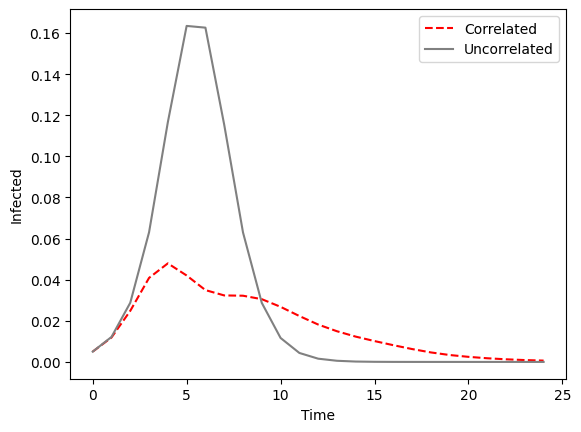

In [230]:
plt.plot(np.array(I_C)/200, label='Correlated', color='red', linestyle='dashed')
plt.plot(np.array(I_UC)/200, label='Uncorrelated', color='grey', linestyle='solid')
plt.xlabel('Time')
plt.ylabel('Infected')
plt.legend()
plt.savefig('Infected.png', dpi=300)
plt.show()

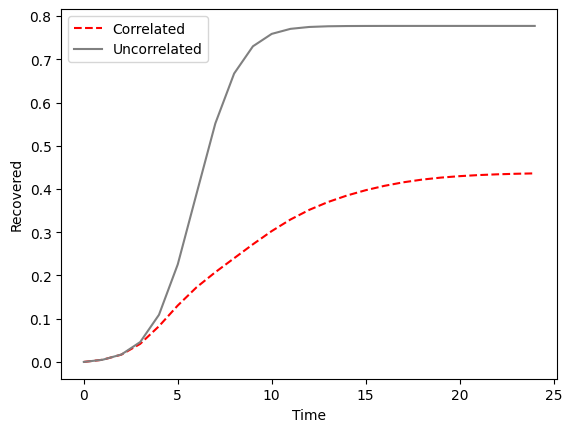

In [231]:
plt.plot(np.array(R_C)/200, label='Correlated', color='red', linestyle='dashed')
plt.plot(np.array(R_UC)/200, label='Uncorrelated', color='grey', linestyle='solid')
plt.xlabel('Time')
plt.ylabel('Recovered')
plt.legend()
plt.savefig('Recovered.png', dpi=300)
plt.show()